In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from scipy import signal

#!python
%matplotlib inline

import time
import numpy as np
from numpy import convolve as np_convolve
from scipy.signal import fftconvolve, lfilter, firwin
from scipy.signal import convolve as sig_convolve
from scipy.signal import fftconvolve, lfilter, firwin
from scipy.signal import convolve as sig_convolve
from scipy.ndimage import convolve1d

### Read in Data

In [134]:
df = pd.read_excel('SensorData.xlsx')

In [135]:
df.head()

,Unnamed: 0,Sensor 1,Sensor 2,Sensor 3,Sensor 4,d_Sensor 1,d_Sensor 2,d_Sensor 3,d_Sensor 4,timeTracker
0,0,1,1,1,0.184,0,0,0,0.000000,0.009585
1,1,1,1,1,0.168,0,0,0,-1.762961,0.018661
2,2,1,1,1,0.184,0,0,0,1.735335,0.027881
3,3,1,1,1,0.172,0,0,0,-1.329942,0.036904
4,4,1,1,1,0.188,0,0,0,1.770916,0.045938


### EDA

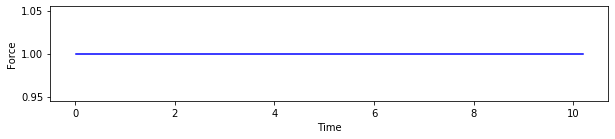

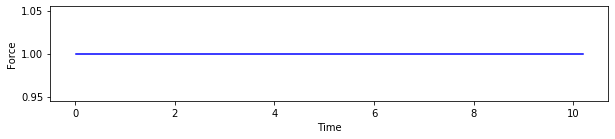

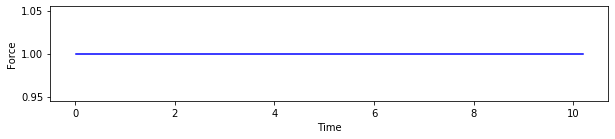

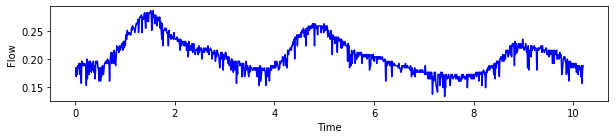

In [136]:
fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,1)
plt.plot(df['timeTracker'], df['Sensor 1'], 'b')
plt.xlabel('Time')
plt.ylabel('Force')
plt.show()

fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,2)
plt.plot(df['timeTracker'], df['Sensor 2'], 'b')
plt.xlabel('Time')
plt.ylabel('Force')
plt.show()

fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,3)
plt.plot(df['timeTracker'], df['Sensor 3'], 'b')
plt.xlabel('Time')
plt.ylabel('Force')
plt.show()

fig = plt.figure(figsize = (10, 8))
plt.subplot(4,1,4)
plt.plot(df['timeTracker'], df['Sensor 4'], 'b')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.show()


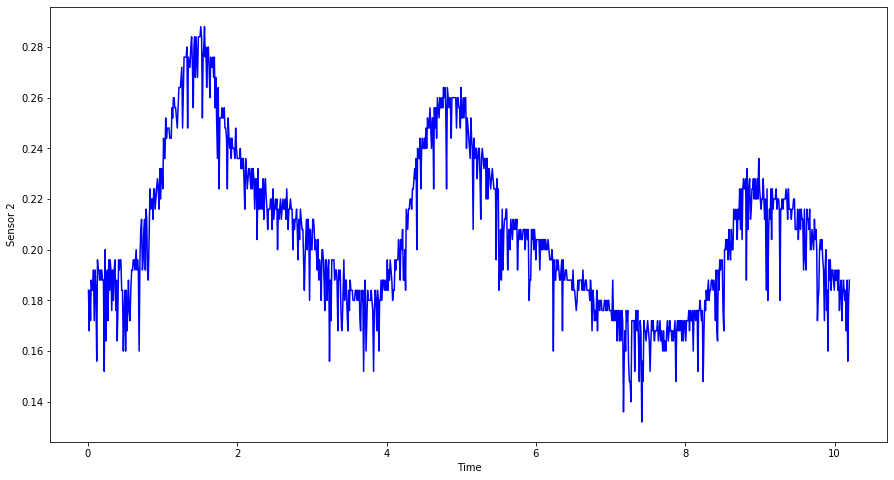

In [137]:
fig = plt.figure(figsize = (15, 8))
plt.plot(df['timeTracker'], df['Sensor 4'], 'b')
plt.xlabel('Time')
plt.ylabel('Sensor 2')
plt.show()

In [138]:
a = np.array(df['Sensor 4'])

In [29]:
#!python

from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

In [30]:
sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)

In [31]:
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 2.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, a)

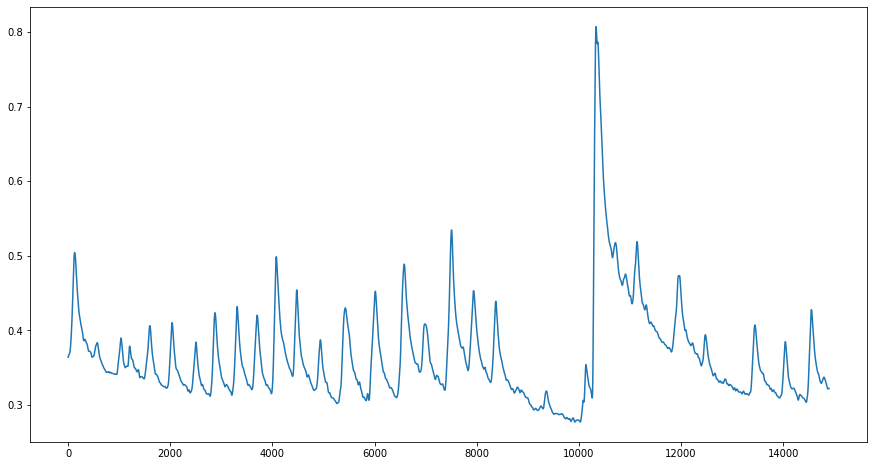

In [36]:
fig = plt.figure(figsize = (15, 8))
plt.plot(filtered_x[100:15000])

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 500
sz = (n_iter,) # size of array
x = 0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.array(df['Sensor 4']) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.4
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]
    

In [139]:
def simpleKalman(x, mea_e, est_e, q):
    
    y = np.zeros(len(x))
    err_measure = mea_e
    err_estimate = est_e
    last_estimate = x[0]
    y[0] = last_estimate
    
    for i in range(1, len(x)):
        
        kalman_gain = err_estimate / (err_estimate + err_measure)
        current_estimate = last_estimate + kalman_gain * (x[i] - last_estimate)
        err_estimate =  (1.0 - kalman_gain)*err_estimate + abs(last_estimate-current_estimate)*q
        y[i] = current_estimate
        last_estimate = current_estimate
        
    return y

# q is noise amp
# est_e - error in the model


In [140]:
a = np.array(df['Sensor 4'])

In [141]:
a

array([0.184, 0.168, 0.184, 0.172, 0.188, 0.184, 0.184, 0.192, 0.172,
       0.192, 0.184, 0.156, 0.196, 0.192, 0.192, 0.188, 0.192, 0.188,
       0.192, 0.188, 0.188, 0.152, 0.2  , 0.164, 0.188, 0.192, 0.172,
       0.196, 0.184, 0.196, 0.192, 0.176, 0.192, 0.18 , 0.192, 0.196,
       0.176, 0.188, 0.164, 0.176, 0.196, 0.192, 0.196, 0.196, 0.184,
       0.184, 0.16 , 0.176, 0.184, 0.16 , 0.184, 0.168, 0.176, 0.188,
       0.176, 0.172, 0.184, 0.192, 0.192, 0.196, 0.196, 0.192, 0.196,
       0.2  , 0.192, 0.196, 0.192, 0.16 , 0.196, 0.208, 0.212, 0.192,
       0.196, 0.208, 0.212, 0.192, 0.216, 0.212, 0.192, 0.188, 0.204,
       0.224, 0.216, 0.22 , 0.22 , 0.212, 0.224, 0.224, 0.216, 0.22 ,
       0.224, 0.228, 0.224, 0.216, 0.232, 0.22 , 0.232, 0.232, 0.224,
       0.244, 0.236, 0.236, 0.252, 0.244, 0.248, 0.248, 0.248, 0.244,
       0.244, 0.244, 0.256, 0.252, 0.26 , 0.26 , 0.256, 0.256, 0.252,
       0.248, 0.256, 0.264, 0.264, 0.264, 0.268, 0.272, 0.248, 0.276,
       0.276, 0.276,

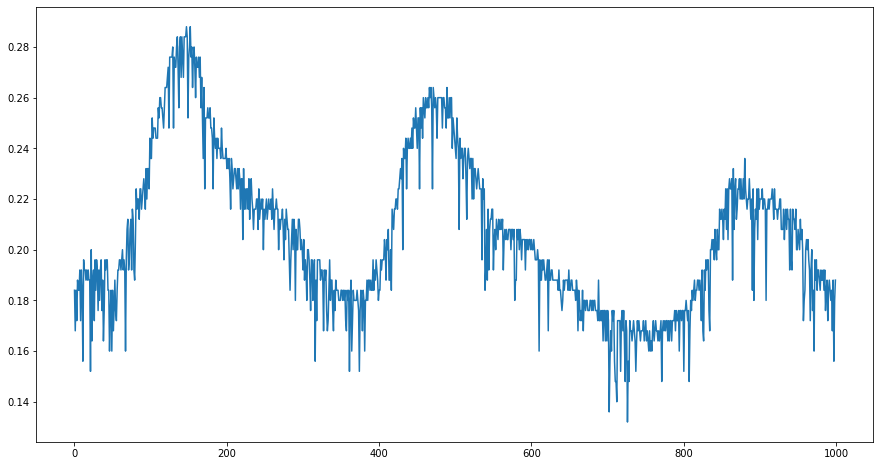

In [142]:
fig = plt.figure(figsize = (15, 8))
plt.plot(df['Sensor 4'])

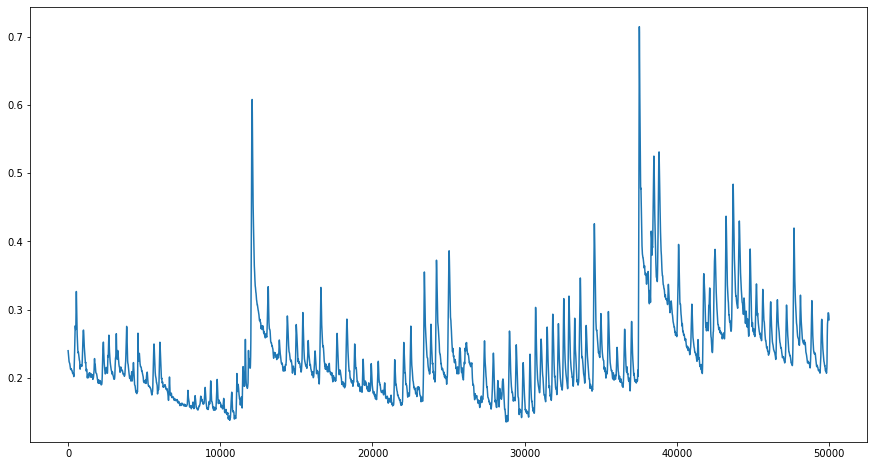

In [143]:
fig = plt.figure(figsize = (15, 8))
plt.plot(filtered_x[30000:80000])

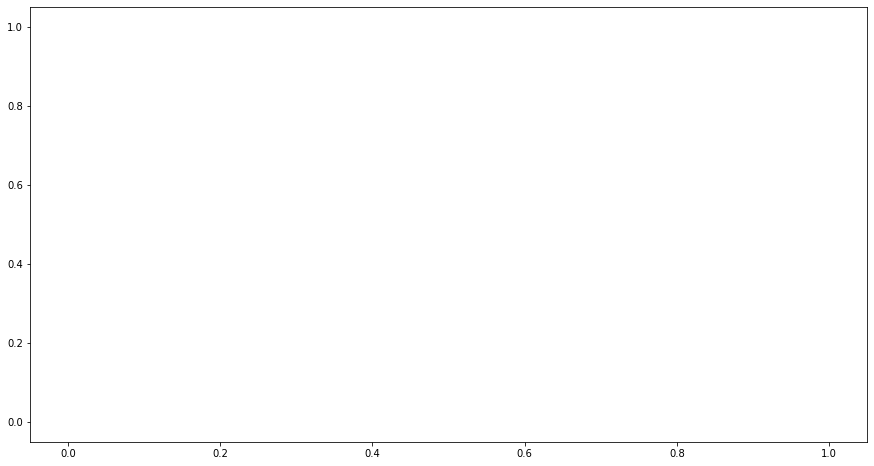

In [144]:
b = simpleKalman(a, 0.55, 0.65, 0.1)
fig = plt.figure(figsize = (15, 8))
plt.plot(b[30000:80000])